In [100]:
#air passengers
# !pip install pyramid-arima

In [132]:
import pandas as pd
from dateutil import parser

In [133]:
df = pd.read_csv("AirPassengers.csv", parse_dates = ["Month"], 
                 index_col = ["Month"])

In [134]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 0.98, 'Additive Decompose')

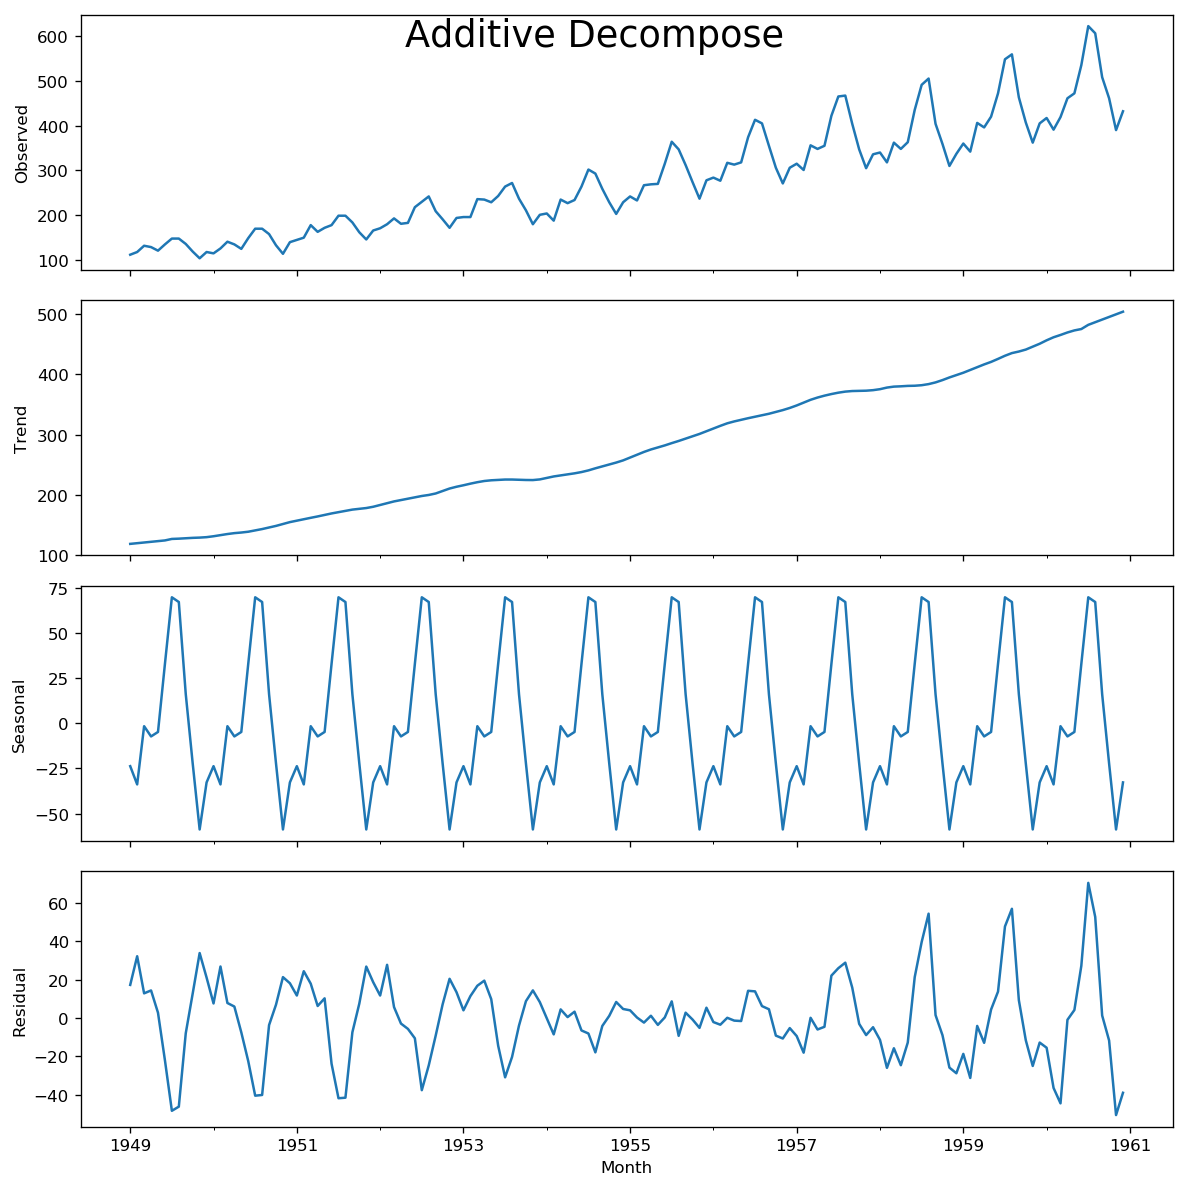

In [137]:
result_add = seasonal_decompose(df['#Passengers'], 
                                model='additive', 
                                extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)


In [114]:
# df["Month"] = pd.to_datetime(df["Month"])
# df=  df.set_index(["Month"])

In [115]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


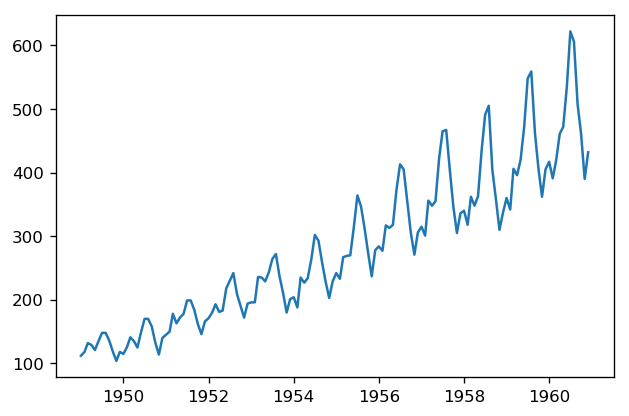

In [118]:
plt.figure(figsize=(6,4))
import matplotlib.pyplot as plt
plt.plot(df)

In [16]:
rolmean = df["#Passengers"].rolling(12).mean().dropna()
rolstd = df["#Passengers"].rolling(12).std().dropna()

In [18]:
rolmean

Month
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
1951-07-01    158.333333
1951-08-01    160.750000
1951-09-01    162.916667
1951-10-01    165.333333
1951-11-01    168.000000
1951-12-01    170.166667
1952-01-01    172.333333
1952-02-01    174.833333
1952-03-01    176.083333
1952-04-01    177.583333
1952-05-01    178.500000
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

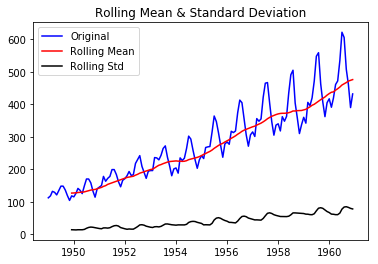

In [19]:
orig = plt.plot(df["#Passengers"], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [138]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df["#Passengers"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [139]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



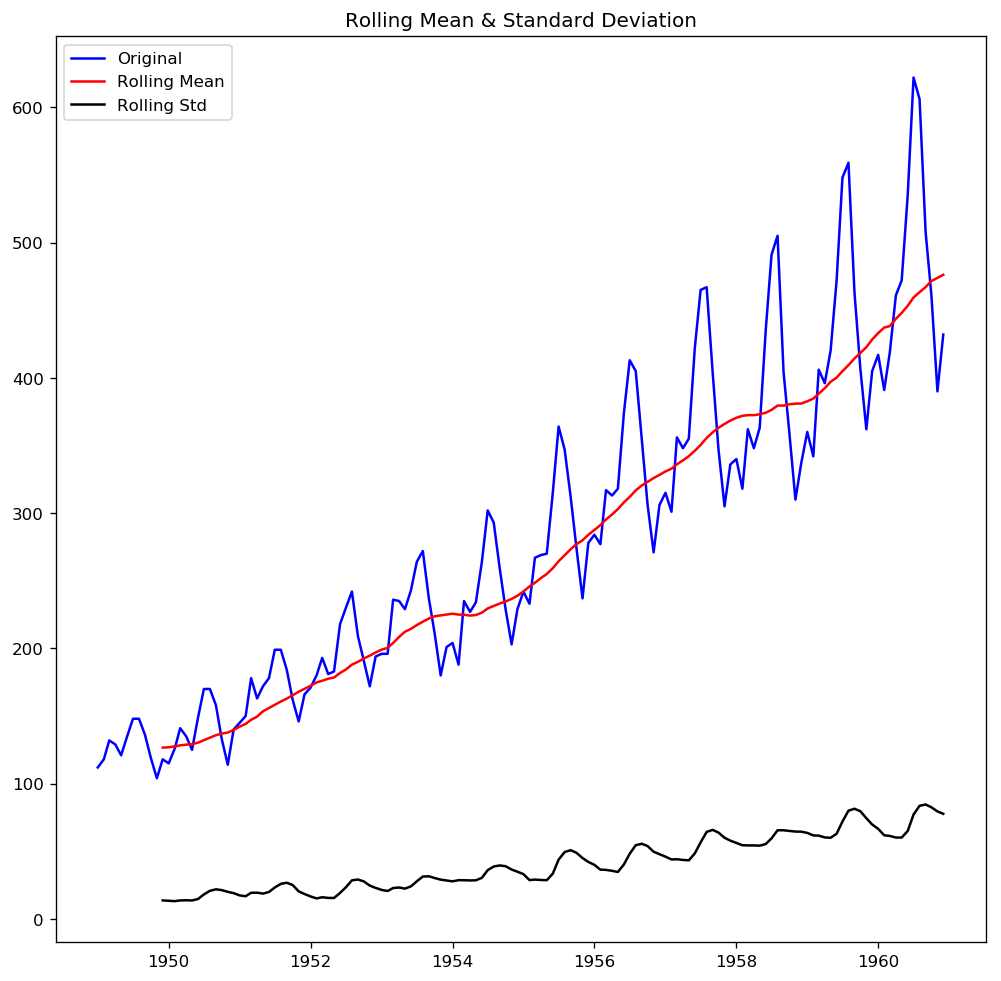

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [140]:
test_stationarity(df["#Passengers"])

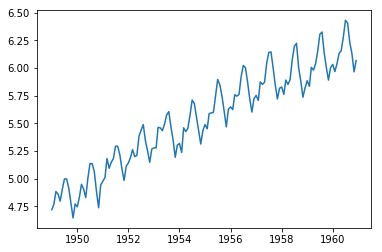

In [28]:
import numpy as np
df_log = np.log(df)
plt.plot(df_log)

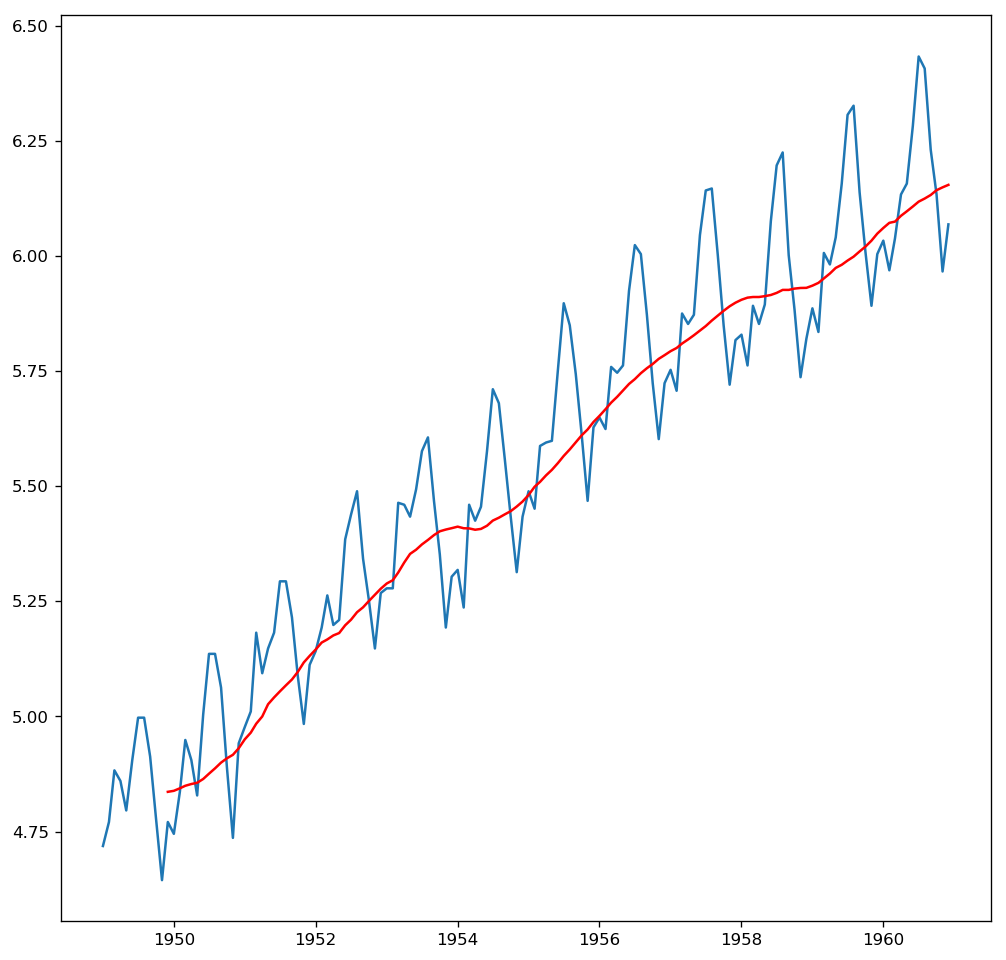

In [141]:
moving_avg = df_log.rolling(12).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')


In [142]:
df_log_moving_avg_diff =df_log - moving_avg
df_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


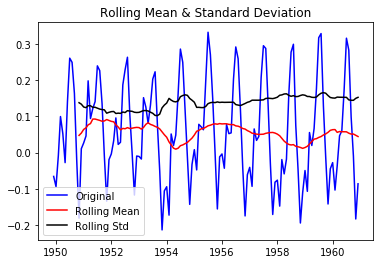

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [32]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff["#Passengers"])

In [63]:
# expwighted_avg = pd.ewma(df_log, halflife=12)
# plt.plot(df_log)
# plt.plot(expwighted_avg, color='red')

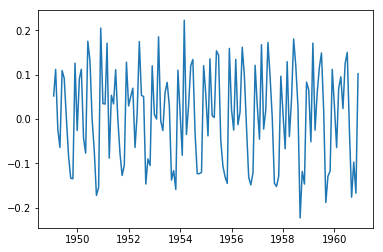

In [34]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

In [64]:
# df_log_diff

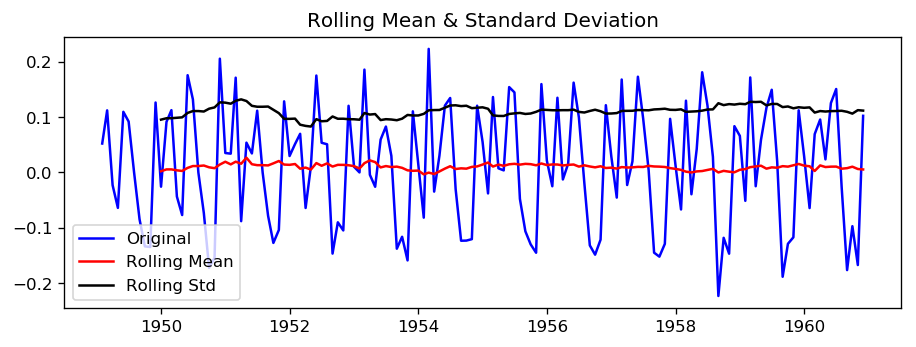

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [65]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff["#Passengers"])

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [128]:
decomposition = seasonal_decompose(df, model = "additive", 
                                   extrapolate_trend="freq")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [129]:
seasonal

,#Passengers
Month,
1949-01-01,-23.790261
1949-02-01,-33.871846
1949-03-01,-1.682598
1949-04-01,-7.340572
1949-05-01,-4.866602
1949-06-01,32.787924
1949-07-01,69.623803
1949-08-01,67.003453
1949-09-01,16.028936


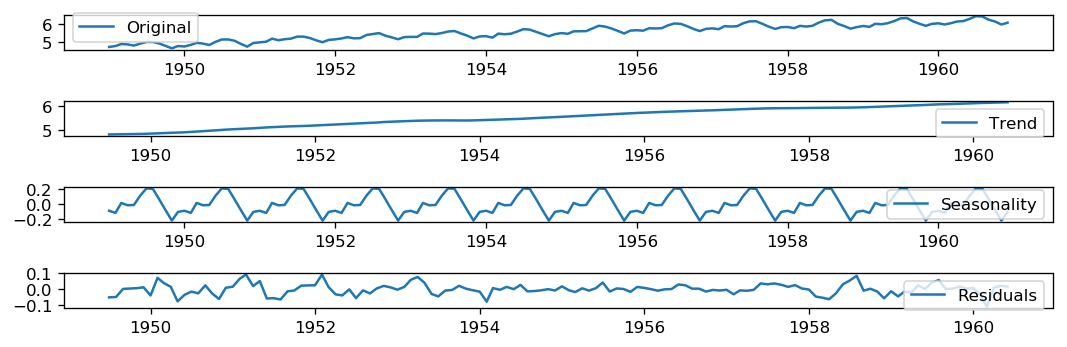

In [68]:
plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

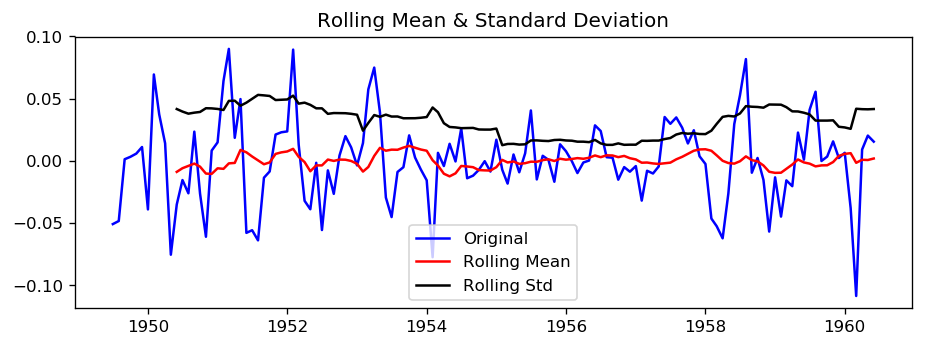

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [69]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose["#Passengers"])

In [70]:
result_mul = seasonal_decompose(df_log, model='multiplicative', extrapolate_trend='freq')


Text(0.5, 0.98, 'Multiplicative Decompose')

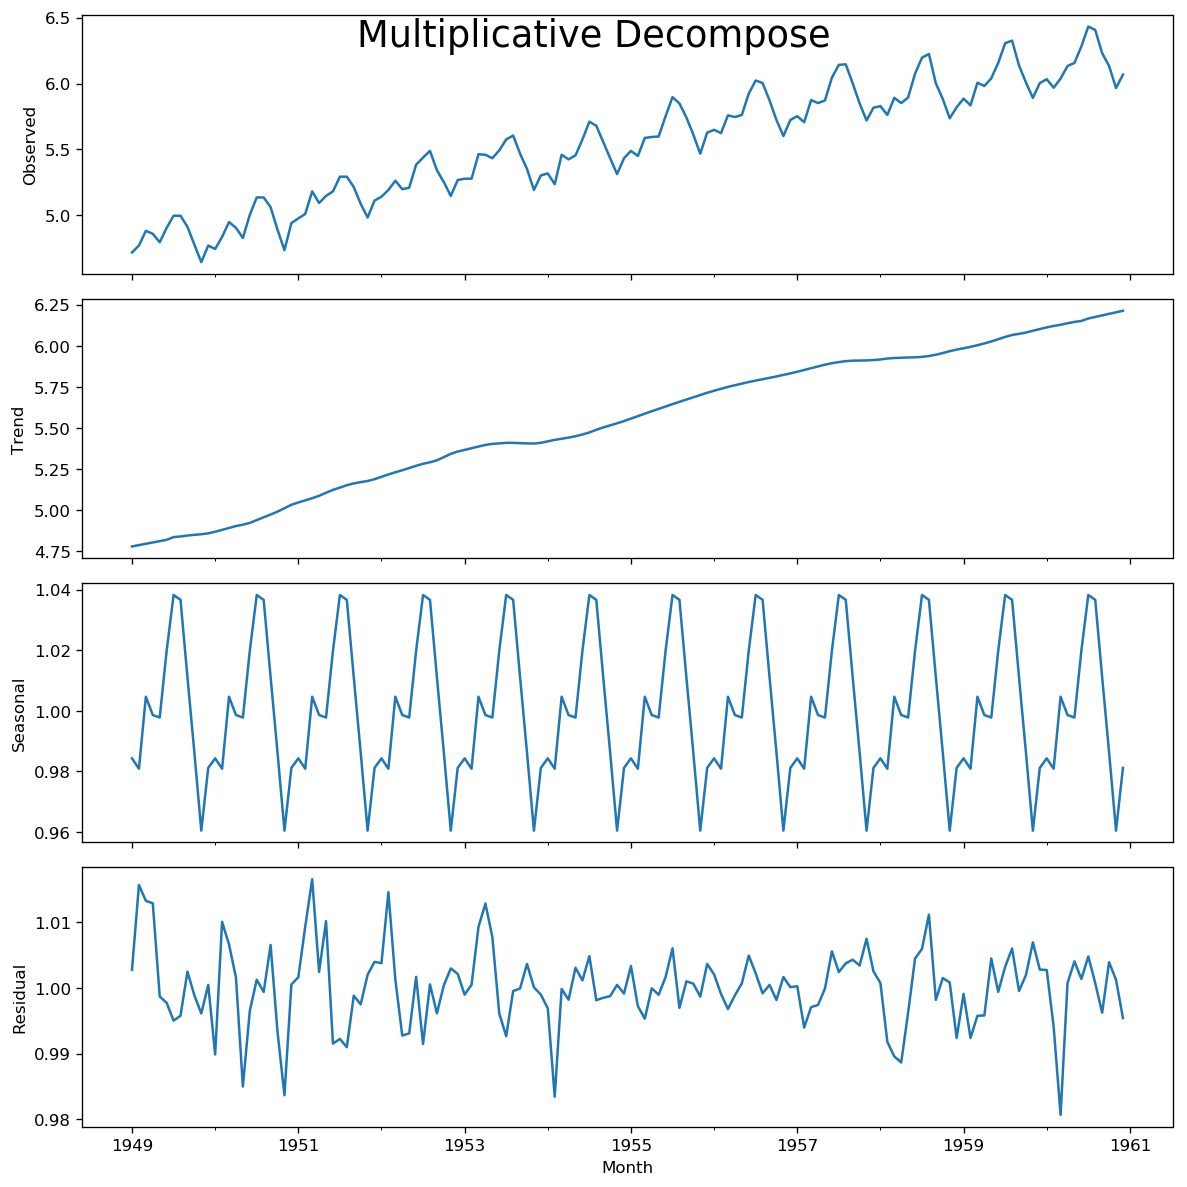

In [72]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

In [73]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Month,,,,
1949-01-01,0.984323,4.780494,1.002752,4.718499
1949-02-01,0.980896,4.788538,1.015675,4.770685
1949-03-01,1.004650,4.796583,1.013263,4.882802
1949-04-01,0.998620,4.804627,1.012884,4.859812
1949-05-01,0.997792,4.812672,0.998698,4.795791


In [78]:
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(df_log_decompose["#Passengers"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_log_decompose["#Passengers"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.332386797644867
p-value: 2.8850589033233625e-08
Critial Values:
   1%, -3.4851223522012855
Critial Values:
   5%, -2.88553750045158
Critial Values:
   10%, -2.5795685622144586

KPSS Statistic: 0.094836
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [79]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

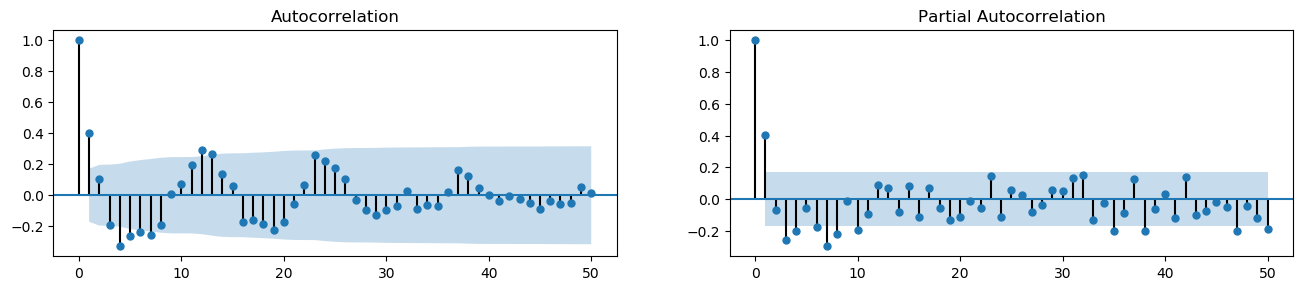

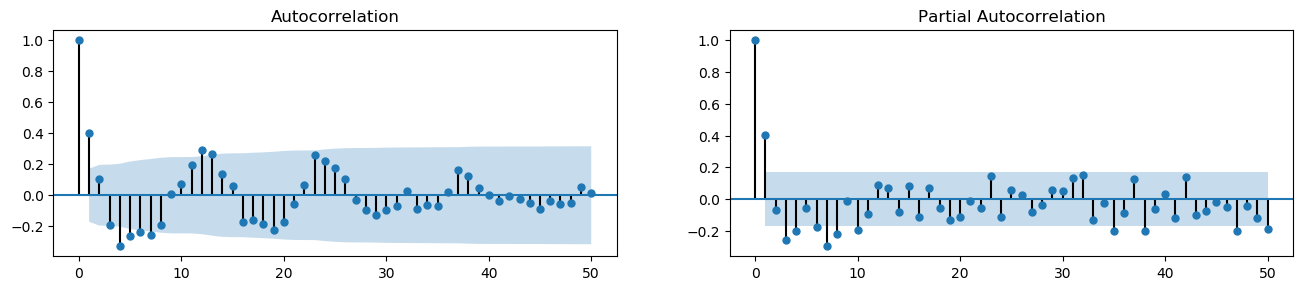

In [145]:
acf_50 = acf(df_log_decompose["#Passengers"], nlags=50)
pacf_50 = pacf(df_log_decompose["#Passengers"], nlags=50)

#Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_log_decompose["#Passengers"].tolist(), lags=50, ax=axes[0])
plot_pacf(df_log_decompose["#Passengers"].tolist(), lags=50, ax=axes[1])

In [153]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_log_decompose["#Passengers"], order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                     ARMA(2, 2)   Log Likelihood                 290.237
Method:                       css-mle   S.D. of innovations              0.026
Date:                Sun, 07 Apr 2019   AIC                           -568.473
Time:                        13:06:27   BIC                           -551.177
Sample:                    07-01-1949   HQIC                          -561.445
                         - 06-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      1.007      0.316      -0.000       0.001
ar.L1.#Passengers     1.5030      0.096     15.672      0.000       1.315       1.691
ar.L2.#Passengers    -0.

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [82]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_log_decompose["#Passengers"], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 268.609
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 07 Apr 2019   AIC                           -529.218
Time:                        05:37:23   BIC                           -517.717
Sample:                    08-01-1949   HQIC                          -524.544
                         - 06-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.028e-05      0.000      0.257      0.798      -0.000       0.000
ar.L1.D.#Passengers     0.4144      0.081      5.114      0.000       0.256       0.573
ma.L1.D.#Passeng

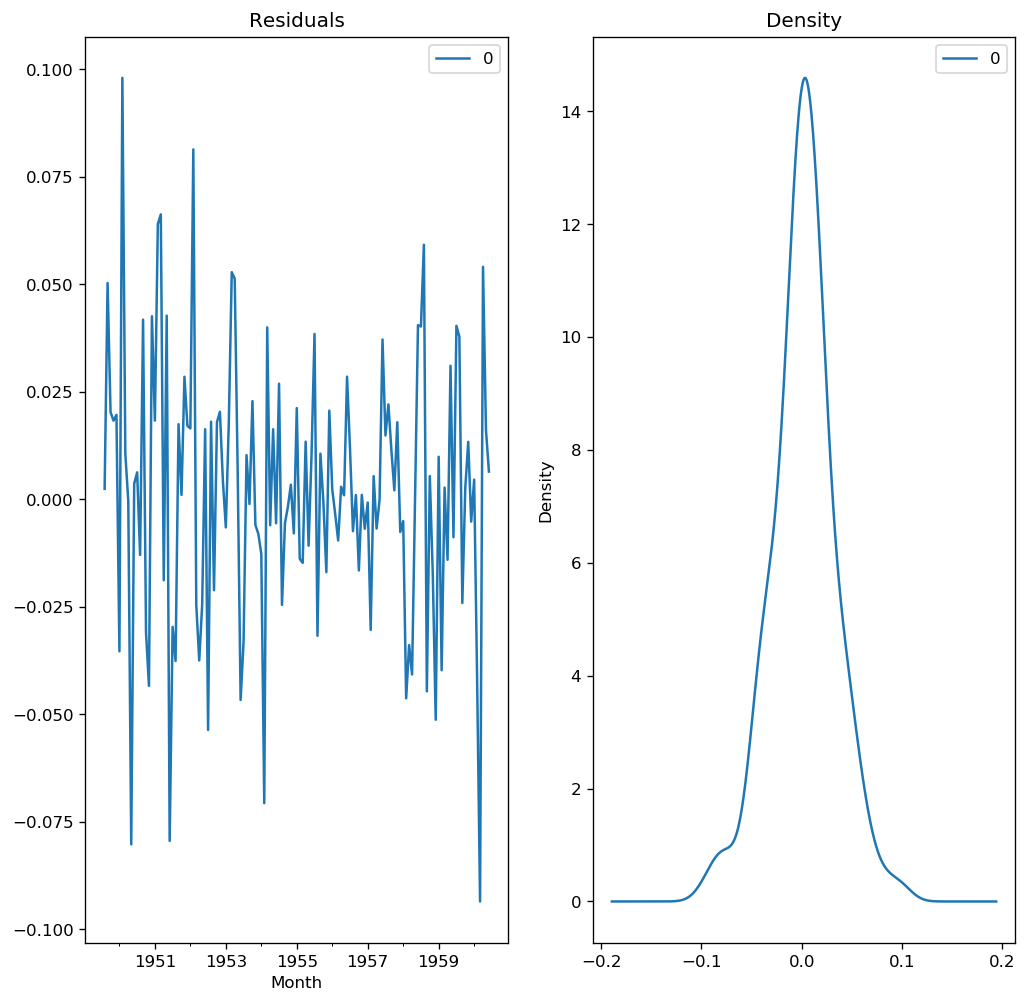

In [83]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

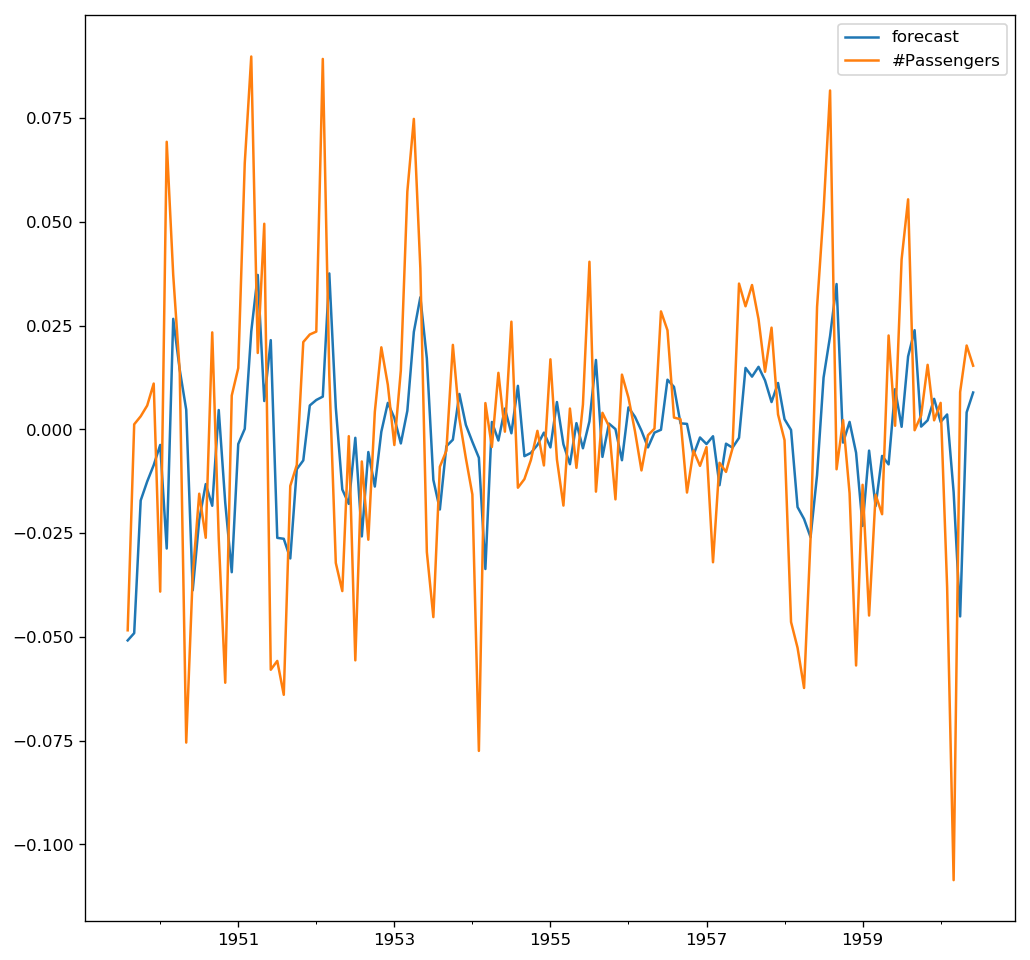

In [84]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [86]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_log_decompose["#Passengers"][:85]
test = df_log_decompose["#Passengers"][85:]


In [89]:
test.shape

(47,)

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


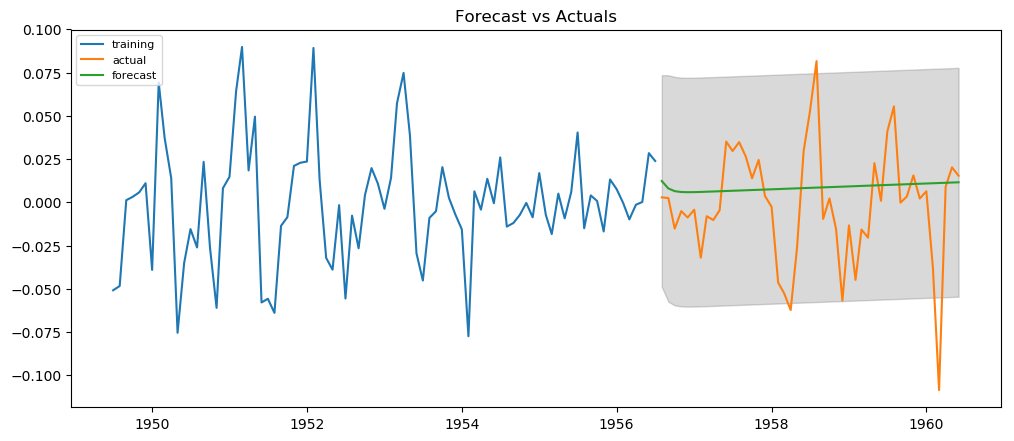

In [90]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(47, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/User

                             ARIMA Model Results                              
Dep. Variable:         D2.#Passengers   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 156.531
Method:                       css-mle   S.D. of innovations              0.036
Date:                Sun, 07 Apr 2019   AIC                           -301.061
Time:                        05:40:35   BIC                           -286.548
Sample:                    09-01-1949   HQIC                          -295.231
                         - 07-01-1956                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.769e-05      0.000     -0.170      0.865      -0.000       0.000
ar.L1.D2.#Passengers    -0.2978      0.108     -2.764      0.007      -0.509      -0.087
ar.L2.D2.#Pa

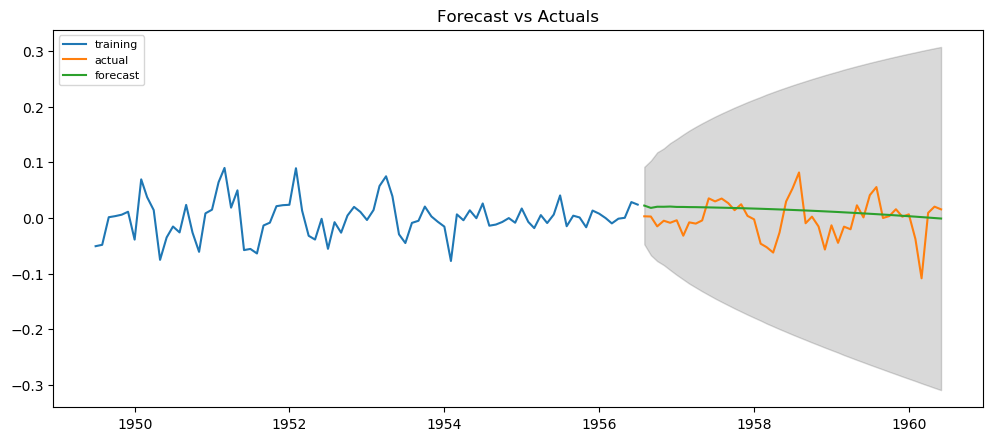

In [91]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(47, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)



{'mape': 2.7500095286879866,
 'me': 0.014139609185794242,
 'mae': 0.02845119736731116,
 'mpe': -1.4163810605756728,
 'rmse': 0.036501557458537726,
 'acf1': 0.4735041165328828,
 'corr': 0.0422798201825943,
 'minmax': 3.5292245885869193}

In [94]:
from statsmodels.tsa.arima_model import ARIMA


In [98]:

# !pip install pyramid-arima
# import pmdarima as pm

In [46]:
from statsmodels.tsa.stattools import acf, pacf

In [47]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

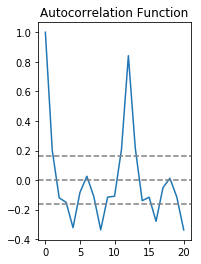

In [49]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


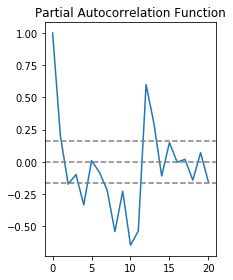

In [50]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [51]:
from statsmodels.tsa.arima_model import ARIMA


/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

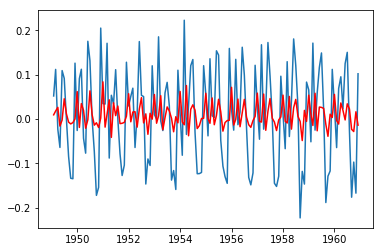

In [54]:
model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_diff)**2))

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

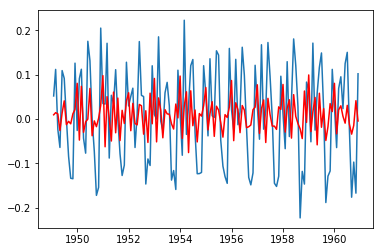

In [56]:
# model = ARIMA(df_log, order=(0, 1, 2))  
# results_MA = model.fit(disp=-1)  
# plt.plot(df_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff)**2))

In [58]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_log_moving_avg_diff["#Passengers"], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.162908
p-value: 0.022235


In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_log_moving_avg_diff.diff().dropna()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_log_moving_avg_diff.diff().dropna(), ax=axes[1])

plt.show()

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ValueError: view limit minimum -35792.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units